<a href="https://colab.research.google.com/github/Vincent3003/Analyze-Layoff-Data/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
# import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objects as go



# The first step is to mount your Google Drive to your Colab account.
#You will be asked to authorize Colab to access your Google Drive. Follow the steps they lead you throuh.

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
path = '/content/drive/MyDrive/Project/layoffs_data(3).csv'

layoff = pd.read_csv(path)
print("data is a ", type(layoff))

data is a  <class 'pandas.core.frame.DataFrame'>


In [211]:
layoff.shape

(3485, 12)

In [212]:
print(layoff)

              Company     Location_HQ        Industry  Percentage        Date  \
0              Fisker     Los Angeles  Transportation        0.15  2024-02-29   
1     Electronic Arts     SF Bay Area        Consumer        0.05  2024-02-28   
2              Vacasa        Portland          Travel        0.05  2024-02-28   
3      Treasury Prime     SF Bay Area         Finance        0.40  2024-02-28   
4            Motional          Boston  Transportation        0.05  2024-02-28   
...               ...             ...             ...         ...         ...   
3480          Service     Los Angeles          Travel        1.00  2020-03-16   
3481     HopSkipDrive     Los Angeles  Transportation        0.10  2020-03-13   
3482      Panda Squad     SF Bay Area        Consumer        0.75  2020-03-13   
3483    Tamara Mellon     Los Angeles          Retail        0.40  2020-03-12   
3484         EasyPost  Salt Lake City       Logistics         NaN  2020-03-11   

                           

In [213]:
layoff.isna()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,False,False,False,False,False,False,False,False,False,False,True,False
3481,False,False,False,False,False,False,False,False,False,False,False,False
3482,False,False,False,False,False,False,False,False,False,False,False,False
3483,False,False,False,False,False,False,False,False,False,False,False,False


In [214]:
# drop Source and List_of_Employees_Laid_Off columns since it is not neccesarily
layoff_new = layoff.drop(columns=['Source', 'List_of_Employees_Laid_Off', 'Date_Added'])

In [215]:
layoff_new.rename(columns = {'Laid_Off_Count': 'Layoffs'}, inplace = True)

In [216]:
# Convert the 'Date' column to a datetime format
layoff_new['Date'] = pd.to_datetime(layoff_new['Date'])

In [217]:
print(layoff_new)

              Company     Location_HQ        Industry  Percentage       Date  \
0              Fisker     Los Angeles  Transportation        0.15 2024-02-29   
1     Electronic Arts     SF Bay Area        Consumer        0.05 2024-02-28   
2              Vacasa        Portland          Travel        0.05 2024-02-28   
3      Treasury Prime     SF Bay Area         Finance        0.40 2024-02-28   
4            Motional          Boston  Transportation        0.05 2024-02-28   
...               ...             ...             ...         ...        ...   
3480          Service     Los Angeles          Travel        1.00 2020-03-16   
3481     HopSkipDrive     Los Angeles  Transportation        0.10 2020-03-13   
3482      Panda Squad     SF Bay Area        Consumer        0.75 2020-03-13   
3483    Tamara Mellon     Los Angeles          Retail        0.40 2020-03-12   
3484         EasyPost  Salt Lake City       Logistics         NaN 2020-03-11   

      Funds_Raised     Stage        Cou

In [218]:
# replace missing data here
print("before drop: ", layoff_new.shape)
layoff_new.fillna(0, inplace=True)
print("after drop: " , layoff_new.shape)

before drop:  (3485, 9)
after drop:  (3485, 9)


In [219]:
print('Amount of duplicates - Before: {:,}'.format(layoff_new.duplicated().sum())) # see how many duplicate in a dataset
layoff_new.drop_duplicates(inplace=True)
print('Amount of duplicates - After: {:,}'.format(layoff_new.duplicated().sum()))

Amount of duplicates - Before: 2
Amount of duplicates - After: 0


In [220]:
layoff_new['Quarter'] = pd.to_datetime(layoff_new['Date'].values, format='%m %Y').astype('period[Q]')
print(layoff_new)

              Company     Location_HQ        Industry  Percentage       Date  \
0              Fisker     Los Angeles  Transportation        0.15 2024-02-29   
1     Electronic Arts     SF Bay Area        Consumer        0.05 2024-02-28   
2              Vacasa        Portland          Travel        0.05 2024-02-28   
3      Treasury Prime     SF Bay Area         Finance        0.40 2024-02-28   
4            Motional          Boston  Transportation        0.05 2024-02-28   
...               ...             ...             ...         ...        ...   
3480          Service     Los Angeles          Travel        1.00 2020-03-16   
3481     HopSkipDrive     Los Angeles  Transportation        0.10 2020-03-13   
3482      Panda Squad     SF Bay Area        Consumer        0.75 2020-03-13   
3483    Tamara Mellon     Los Angeles          Retail        0.40 2020-03-12   
3484         EasyPost  Salt Lake City       Logistics        0.00 2020-03-11   

      Funds_Raised     Stage        Cou

In [221]:
layoff_new.dtypes

Company                 object
Location_HQ             object
Industry                object
Percentage             float64
Date            datetime64[ns]
Funds_Raised           float64
Stage                   object
Country                 object
Layoffs                float64
Quarter          period[Q-DEC]
dtype: object

In [222]:
layoff_new['Quarter'] = layoff_new['Quarter'].astype(str)
layoff_new.dtypes

Company                 object
Location_HQ             object
Industry                object
Percentage             float64
Date            datetime64[ns]
Funds_Raised           float64
Stage                   object
Country                 object
Layoffs                float64
Quarter                 object
dtype: object

In [243]:
# or in one step:
layoff_USA = layoff_new[ layoff_new['Country'] == 'United States' ]
layoff_USA

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Layoffs,Quarter
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,1700.0,Post-IPO,United States,0.0,2024Q1
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,2.0,Post-IPO,United States,670.0,2024Q1
2,Vacasa,Portland,Travel,0.05,2024-02-28,834.0,Post-IPO,United States,320.0,2024Q1
3,Treasury Prime,SF Bay Area,Finance,0.40,2024-02-28,71.0,Series C,United States,40.0,2024Q1
4,Motional,Boston,Transportation,0.05,2024-02-28,0.0,Unknown,United States,0.0,2024Q1
...,...,...,...,...,...,...,...,...,...,...
3480,Service,Los Angeles,Travel,1.00,2020-03-16,5.1,Seed,United States,0.0,2020Q1
3481,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0,2020Q1
3482,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0,2020Q1
3483,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20.0,2020Q1


In [244]:
layoff_USA.dtypes

Company                 object
Location_HQ             object
Industry                object
Percentage             float64
Date            datetime64[ns]
Funds_Raised           float64
Stage                   object
Country                 object
Layoffs                float64
Quarter                 object
dtype: object

<h1>EDA Process to gain a better understanding of a data set, to find a trend/ pattern </h1>
<h3>1. Data Visualization</h3>

In [225]:
colors = ['#ffac81', '#ff928b', '#fec3a6', '#efe9ae', '#cdeac0', '#b8dbd9', '#eae8ff', '#b0d7ff', '#F2BEFC', '#708B75',
          '#d8d5db', '#d2d6ef', '#044B7F', '#abc4ab', '#6d4c3d', '#727D71', '#89A1EF', '#C6B9CD', '#0F5257', '#3A5A40']

In [226]:
# Grouping by industry and summing the layoffs
industry_layoffs = layoff_new.groupby('Industry')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_layoffs))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig1 = go.Figure([go.Bar(x=industry_layoffs.index,
                          y=industry_layoffs.values,
                          text=industry_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries with the Most Layoffs around the world', yaxis=dict(title='Total layoff'), xaxis=dict(title='Industry')))

fig1.show()

In [227]:
# Grouping by industry and summing the layoffs
industry_percent_layoffs = layoff_new.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).head(20)
industry_percent_layoffs = round(industry_percent_layoffs, 2)

# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_percent_layoffs))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig2 = go.Figure([go.Bar(x=industry_percent_layoffs.index,
                          y=industry_percent_layoffs.values,
                          text=industry_percent_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries Percentage with the Most Layoffs around the world',
                                   yaxis=dict(title='Average percentage of layoff'), xaxis=dict(title='Industry')))

fig2.show()

In [228]:
# Grouping by industry and summing the layoffs
industry_layoffs_USA = layoff_USA.groupby('Industry')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
random_colors = random.sample(colors, len(industry_layoffs_USA))

# Bar chart for top industries with the most layoffs
fig3 = go.Figure([go.Bar(x=industry_layoffs_USA.index,
                          y=industry_layoffs_USA.values,
                          text=industry_layoffs_USA.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries with the Most Layoffs in America',
                                   yaxis=dict(title='Total layoff'), xaxis=dict(title='Industry')))

fig3.show()

In [229]:
# Grouping by industry and summing the layoffs
industry_percent_layoffs_USA = layoff_USA.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).head(20)
industry_percent_layoffs_USA = round(industry_percent_layoffs_USA, 2)


# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_percent_layoffs_USA))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig4 = go.Figure([go.Bar(x=industry_percent_layoffs_USA.index,
                          y=industry_percent_layoffs_USA.values,
                          text=industry_percent_layoffs_USA.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries Percentage with the Most Layoffs in America',
                                   yaxis=dict(title='Average percentage of layoff'), xaxis=dict(title='Industry')))

fig4.show()

In [230]:
# Grouping by industry and summing the layoffs
country_layoffs = layoff_new.groupby('Country')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
random_colors = random.sample(colors, len(industry_layoffs))

# Bar chart for top industries with the most layoffs
fig5 = go.Figure([go.Bar(x=country_layoffs.index,
                          y=country_layoffs.values,
                          text=country_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Countries with the Most Layoffs in the world'))

fig5.show()

In [231]:
# Grouping by industry and summing the layoffs
locatoin_layoffs = layoff_new.groupby('Location_HQ')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
random_colors = random.sample(colors, len(industry_layoffs))

# Bar chart for top industries with the most layoffs
fig6 = go.Figure([go.Bar(x=locatoin_layoffs.index,
                          y=locatoin_layoffs.values,
                          text=locatoin_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Locations with the Most Layoffs in America'))

fig6.show()

In [232]:
# Grouping by industry and summing the layoffs
industry_fund_USA = layoff_USA.groupby('Industry')['Funds_Raised'].mean().sort_values(ascending=False).head(20)
industry_fund_USA = round(industry_fund_USA, 2)


# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_fund_USA))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig7 = go.Figure([go.Bar(x=industry_fund_USA.index,
                          y=industry_fund_USA.values,
                          text=industry_fund_USA.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries are Funded in America',
                                   yaxis=dict(title='Average Funded'), xaxis=dict(title='Industry')))

fig7.show()

In [233]:
# Grouping by industry and summing the layoffs
industry_fund = layoff_new.groupby('Industry')['Funds_Raised'].mean().sort_values(ascending=False).head(20)
industry_fund = round(industry_fund, 2)


# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_fund))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig8 = go.Figure([go.Bar(x=industry_fund.index,
                          y=industry_fund.values,
                          text=industry_fund.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries are Funded in the world',
                                   yaxis=dict(title='Average Funded'), xaxis=dict(title='Industry')))

fig8.show()

In [235]:
# Create a dataframe that contains top 10 primary strength with their highest Layofss and Funds_Raised
bar=layoff_new.groupby(["Company", "Industry"])["Layoffs", "Funds_Raised"].median().nlargest(10, 'Layoffs')
bar

<ipython-input-235-cadcdaee222a>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,Layoffs,Funds_Raised
Company,Industry,,
Meta,Consumer,10000.0,26000.0
Ericsson,Other,8500.0,663.0
SAP,Other,5500.0,1300.0
Philips,Healthcare,5000.0,0.0
Cisco,Infrastructure,4100.0,2.0
Flink,Food,4050.0,1000.0
Micron,Hardware,3600.0,50.0
Dell,Hardware,3325.0,0.0
Xerox,Hardware,3000.0,27200.0


Text(0.5, 0, 'Primary Strength')

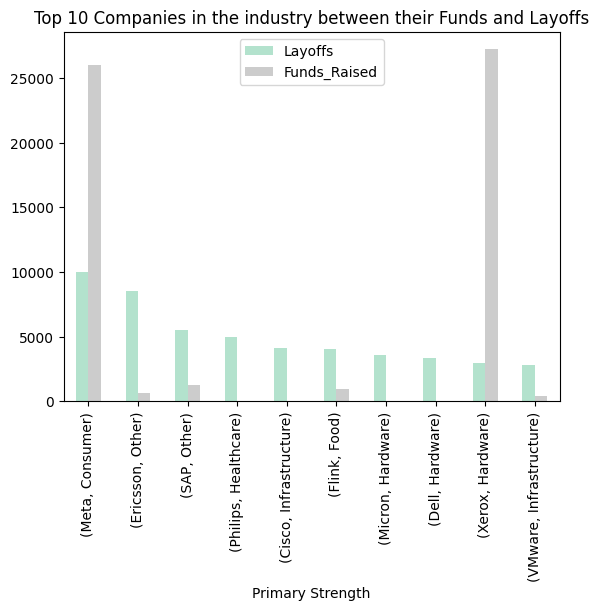

In [236]:
# create a bar graph to show top 10 Pokemon have Attack & Defense ability with their Primary Strength
bar.plot(kind = 'bar', title = 'Top 10 Companies in the industry between their Funds and Layoffs', colormap='Pastel2')
plt.xlabel("Primary Strength")

In [237]:
# Group by 'Date' and count the number of layoffs
layoff_trend = layoff_new.groupby('Date')['Layoffs'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))
fig = px.line(layoff_trend, x='Date', y="Layoffs", markers = True,
              title='Trend of Layoffs Over Time',)
fig.show()

<Figure size 1000x500 with 0 Axes>

In [238]:
# Group by 'Date' and count the number of layoffs
layoff_USA_trend = layoff_USA.groupby('Date')['Layoffs'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))
fig2 = px.line(layoff_USA_trend, x='Date', y="Layoffs", markers = True,
              title='Trend of Layoffs Over Time in America',)
fig2.show()

<Figure size 1000x500 with 0 Axes>

In [245]:
# Group by 'Quarter' and sum the number of layoffs
layoff_USA_quarterly = layoff_USA.groupby('Quarter')['Layoffs'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))
fig2 = px.line(layoff_USA_quarterly, x='Quarter', y="Layoffs", markers=True,
                title='Trend of Layoffs Over Time in America (Quarterly)')
fig2.show()

<Figure size 1000x500 with 0 Axes>

In [247]:
# Group by 'Quarter' and sum the number of layoffs
layoff_quarterly = layoff_new.groupby('Quarter')['Layoffs'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))
fig2 = px.line(layoff_quarterly, x='Quarter', y="Layoffs", markers=True,
                title='Trend of Layoffs Over Time in America (Quarterly)')
fig2.show()

<Figure size 1000x500 with 0 Axes>

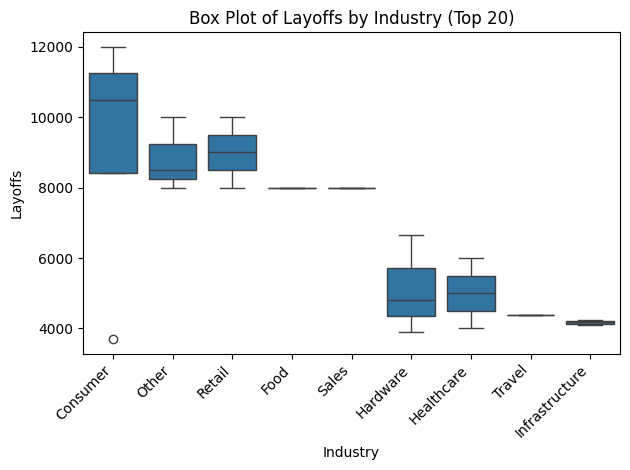

In [268]:
# Select the top 20 rows based on the 'Layoffs' column
top_20 = layoff_new.nlargest(20, 'Layoffs')

# Plotting the box plot
# plt.figure(figsize=(12, 20))
sns.boxplot(x='Industry', y='Layoffs', data=top_20)
plt.title('Box Plot of Layoffs by Industry (Top 20)')
plt.xlabel('Industry')
plt.ylabel('Layoffs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

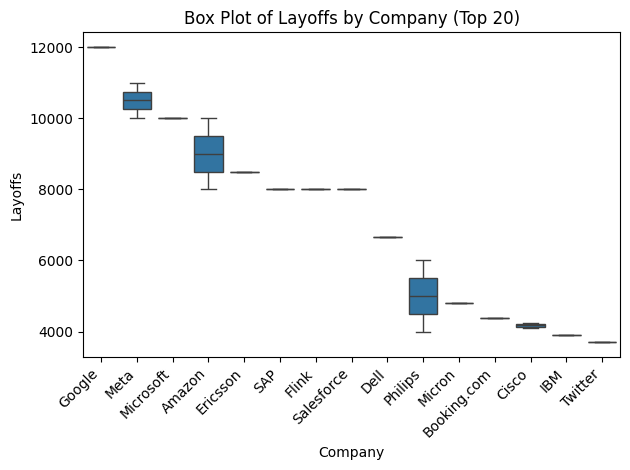

In [269]:
# Plotting the box plot
# plt.figure(figsize=(12, 20))
sns.boxplot(x='Company', y='Layoffs', data=top_20)
plt.title('Box Plot of Layoffs by Company (Top 20)')
plt.xlabel('Company')
plt.ylabel('Layoffs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

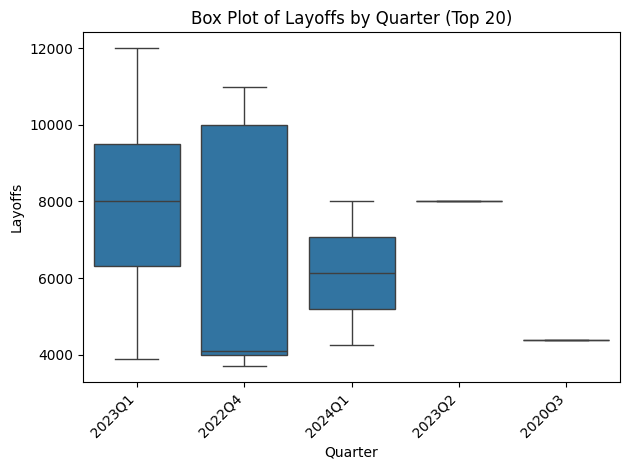

In [270]:
# Plotting the box plot
# plt.figure(figsize=(12, 20))
sns.boxplot(x='Quarter', y='Layoffs', data=top_20)
plt.title('Box Plot of Layoffs by Quarter (Top 20)')
plt.xlabel('Quarter')
plt.ylabel('Layoffs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>2. Finding relationships and correlation between variables</h3>

In [ ]:
 print(np.corrcoef(layoff_new['Layoffs'], layoff_new['Funds_Raised']))

[[1.         0.10041864]
 [0.10041864 1.        ]]


In [ ]:
layoff_new.corr()

<ipython-input-90-270a49826c75>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Percentage,Funds_Raised,Layoffs
Percentage,1.000000,-0.055379,-0.031181
Funds_Raised,-0.055379,1.000000,0.100419
Layoffs,-0.031181,0.100419,1.000000


In [ ]:
layoff_new.describe()[['Funds_Raised', 'Layoffs']]

,Funds_Raised,Layoffs
count,3483.000000,3483.000000
mean,694.248061,164.662934
std,4545.647381,643.564850
min,0.000000,0.000000
25%,27.500000,0.000000
50%,130.000000,38.000000
75%,405.500000,109.000000
max,121900.000000,12000.000000
